In [137]:
import os
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report, \
    confusion_matrix
from sklearn.model_selection import train_test_split
import math
import re
from collections import Counter

In [ ]:
def calculate_entropy(text: str):
    """Calculate the Shannon entropy of a given text."""
    probability = [n_x / len(text) for n_x in Counter(text).values()]
    entropy = -sum(p * math.log2(p) for p in probability)
    return entropy


js_kw = ["break",
         "case",
         "catch",
         "class",
         "const",
         "continue",
         "debugger",
         "default",
         "delete",
         "do",
         "else",
         "export",
         "extends",
         "finally",
         "for",
         "function",
         "if",
         "import",
         "in",
         "instanceof",
         "new",
         "return",
         "super",
         "switch",
         "this",
         "throw",
         "try",
         "typeof",
         "var",
         "void",
         "while",
         "with",
         "yield",
         "let",
         "static",
         "enum",
         "await",
         "implements",
         "interface",
         "package",
         "private",
         "protected",
         "public",
         "null",
         "true",
         "false"]


def parse_js(js_code: str):
    """Parse JavaScript code to compute feature metrics."""
    features = {
        '0': js_code.count('eval('),
        '1': js_code.count('setTimeout('),
        '2': js_code.count('iframe'),
        '3': js_code.count('unescape('),
        '4': js_code.count('escape('),
        '5': js_code.count('classid'),
        '6': js_code.count('parseInt('),
        '7': js_code.count('fromCharCode('),
        '8': js_code.count('ActiveXObject('),
        '9': len(re.findall(r'\w+\s*=\s*(\"[^\"]*\"|\'[^\']*\')', js_code)),
        '10': js_code.count('concat('),
        '11': js_code.count('indexOf('),
        '12': js_code.count('substring('),
        '13': js_code.count('replace('),
        '14': js_code.count('document.addEventListener('),
        '15': js_code.count('attachEvent('),
        '16': js_code.count('createElement('),
        '17': js_code.count('getElementById('),
        '18': js_code.count('document.write('),
        '19': len(js_code.split()),
        '20': len([word for word in js_code.split() if word in js_kw]),
        '21': len(js_code),
        '22': len([word for word in js_code.split() if word in js_kw]) / max(len(js_code.split()), 1),
        '23': calculate_entropy(js_code),
        '24': max((len(word) for word in js_code.split() if word.isalpha()), default=0),
        '25': len([s for s in re.findall(r'"(.*?)"', js_code) if len(s) > 200]),
        '26': min((len(word) for word in js_code.split() if word.isalpha()), default=0),
        '27': calculate_entropy(max(js_code.split(), key=len, default="")),
        '28': js_code.count(' '),
        '29': sum(len(word) for word in js_code.split()) / max(len(js_code.split()), 1),
        '30': len(re.findall(r'0x[0-9a-fA-F]+', js_code)),
        '31': js_code.count(' ') / max(len(js_code), 1),
        '32': js_code.count('search('),
        '33': js_code.count('split('),
        '34': js_code.count('onbeforeunload'),
        '35': js_code.count('onload'),
        '36': js_code.count('onerror('),
        '37': js_code.count('onunload'),
        '38': js_code.count('onbeforeload'),
        '39': js_code.count('onmouseover'),
        '40': js_code.count('dispatchEvent('),
        '41': js_code.count('fireEvent('),
        '42': js_code.count('setAttribute('),
        '43': js_code.count('window.location('),
        '44': js_code.count('charAt('),
        '45': js_code.count('console.log('),
        '46': js_code.count('.js'),
        '47': js_code.count('.php'),
        '48': js_code.count('var '),
        '49': js_code.count('function '),
        '50': js_code.count('Math.random('),
        '51': js_code.count('charCodeAt('),
        '52': js_code.count('WScript'),
        '53': js_code.count('decode('),
        '54': js_code.count('toString('),
        '55': len(re.findall(r'\d', js_code)),
        '56': len(re.findall(r'\\x[0-9a-fA-F]{2}', js_code)),
        '57': js_code.count('\\'),
        '58': js_code.count('|'),
        '59': js_code.count('%'),
        '60': js_code.count('('),
        '61': js_code.count(')'),
        '62': js_code.count(','),
        '63': js_code.count('#'),
        '64': js_code.count('+'),
        '65': js_code.count('.'),
        '66': js_code.count("'"),
        '67': js_code.count('['),
        '68': js_code.count(']'),
        '69': js_code.count('{'),
        '70': js_code.count('}'),
        '71': len(re.findall(r'\\x[0-9a-fA-F]{2}', js_code)) / max(len(js_code), 1),
        '72': len(re.findall(r'\d', js_code)) / max(len(js_code), 1),
        '73': len(re.findall(r'0x[0-9a-fA-F]+', js_code)) / max(len(js_code), 1),
        '74': js_code.count('\\') / max(len(js_code), 1),
        '75': js_code.count('|') / max(len(js_code), 1),
        '76': js_code.count('%') / max(len(js_code), 1),
    }
    return features


In [138]:
data_dir = "./js"
folders = ["benign", "malicious"]

data = []
labels = []

for folder in folders:
    files = os.listdir(os.path.join(data_dir, folder))
    for file in files:
        file_path = os.path.join(data_dir, folder, file)
        with open(file_path, "r", encoding="utf8", errors='ignore') as f:
            js = f.read()
            js = str(js)
            data.append(js)
            labels.append(folder)

df = pd.DataFrame({"js": data, "label": labels})
df

,js,label
0,"\nvar resourceAccountIdRoutingURl = """";\nresou...",benign
1,"\n(function(i,s,o,g,r,a,m){i['GoogleAnalyticsO...",benign
2,dw(txcon(' 中式九球球王争霸赛：杨帆 - 阿布拉江 上半场 比赛快开始了，请到 C...,benign
3,dw(txcon(' 中式九球球王争霸赛：阿不拉江 - 杨帆 下半场 比赛快开始了，请到 C...,benign
4,dw(txcon('CBA 终于等到你—CBA重启特别节目 比赛快开始了，请到 CC直播吧 ...,benign
...,...,...
3779,"<script language=""JavaScript"">\nfunction dnnVi...",malicious
3780,var key = 'vKHU8wx';var b = '\x10>&6L\x1e\x17\...,malicious
3781,var key = 'F5grjV75';var b = ' @\x09\x11\x1e?X...,malicious
3782,"function a(d){for(var g="""",k=null,d=d.toLowerC...",malicious


In [139]:
parsed_features = df['js'].apply(parse_js)
features_df = pd.DataFrame(parsed_features.tolist())
train_df = pd.concat([df['label'], features_df], axis=1)
train_df.columns = ['label'] + [str(i) for i in range(77)]
train_df

,label,0,1,2,3,4,5,6,7,8,...,67,68,69,70,71,72,73,74,75,76
0,benign,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,benign,0,0,0,0,0,0,0,0,0,...,8,8,2,2,0.000000,0.038560,0.000000,0.000000,0.010283,0.000000
2,benign,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.165049,0.000000,0.000000,0.000000,0.000000
3,benign,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.165049,0.000000,0.000000,0.000000,0.000000
4,benign,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.173469,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779,malicious,0,0,0,0,0,0,1,1,0,...,29,29,18,18,0.000000,0.065944,0.000452,0.002710,0.000903,0.000000
3780,malicious,1,0,0,0,0,0,0,1,0,...,6,10,13,6,0.160291,0.318644,0.000000,0.160291,0.001453,0.003874
3781,malicious,1,0,0,0,0,0,0,1,0,...,16,1,9,4,0.158435,0.288998,0.000000,0.158435,0.001956,0.003423
3782,malicious,0,0,1,0,3,0,0,0,0,...,9,9,6,6,0.000000,0.049296,0.000000,0.009603,0.010243,0.001280


<Axes: xlabel='label'>

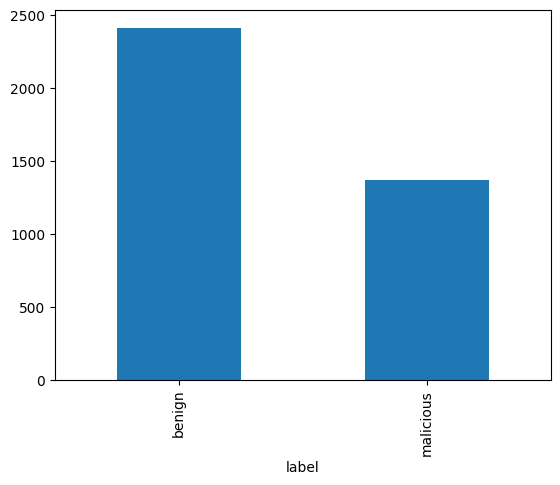

In [140]:
train_df["label"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

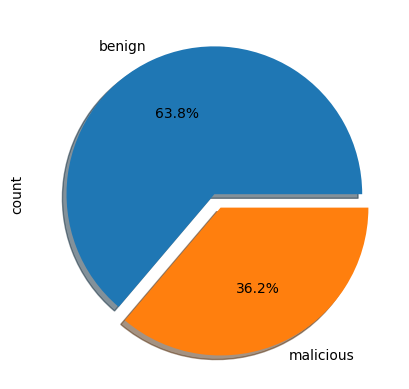

In [141]:
train_df["label"].value_counts().plot(kind="pie", autopct="%.1f%%", shadow=True, explode=[0, 0.1])

In [142]:
X_train, X_test, y_train, y_test = train_test_split(train_df.iloc[:, 1:78], train_df["label"], test_size=0.2,
                                                    random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (3027, 77)
X_test: (757, 77)
y_train: (3027,)
y_test: (757,)


In [143]:
rf = RandomForestClassifier(class_weight="balanced", n_estimators=100, random_state=42, max_depth=3)
rf.fit(X_train, y_train)

rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

rf_train_score = accuracy_score(rf_pred_train, y_train)
rf_test_score = accuracy_score(rf_pred_test, y_test)
print("Random Forest Train Score:", rf_train_score)
print("Random Forest Test Score:", rf_test_score)

rf_precision_score = precision_score(y_test, rf_pred_test, pos_label="malicious")
rf_f1_score = f1_score(y_test, rf_pred_test, pos_label="malicious")
rf_recall_score = recall_score(y_test, rf_pred_test, pos_label="malicious")
rf_accuracy_score = accuracy_score(y_test, rf_pred_test)

print("Random Forest Precision Score:", rf_precision_score)
print("Random Forest F1 Score:", rf_f1_score)
print("Random Forest Recall Score:", rf_recall_score)
print("Random Forest Accuracy Score:", rf_accuracy_score)

class_names = ["benign", "malicious"]
print(classification_report(y_test, rf_pred_test, target_names=class_names))
print(confusion_matrix(y_test, rf_pred_test))

joblib.dump(rf, "random_forest.model")

Random Forest Train Score: 0.994383878427486
Random Forest Test Score: 0.9973579920739762
Random Forest Precision Score: 0.9961832061068703
Random Forest F1 Score: 0.9961832061068703
Random Forest Recall Score: 0.9961832061068703
Random Forest Accuracy Score: 0.9973579920739762
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00       495
   malicious       1.00      1.00      1.00       262

    accuracy                           1.00       757
   macro avg       1.00      1.00      1.00       757
weighted avg       1.00      1.00      1.00       757

[[494   1]
 [  1 261]]


['random_forest.model']

In [147]:
model = joblib.load('random_forest.model')


def predict_js(js_code):
    code_features = parse_js(js_code)
    code_features_df = pd.DataFrame([code_features])
    prediction = model.predict(code_features_df)
    proba = model.predict_proba(code_features_df)
    return {
        "prediction": prediction[0],
        "benign_probability": round(proba[0][0].item(), 4),
        "malicious_probability": round(proba[0][1].item(), 4)
    }

In [148]:
dir_name = "js/test_files"

directory = os.fsencode(dir_name)

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".js"):
        with open(dir_name + '/' + filename, "r", encoding='utf-8', errors='ignore') as f:
            code = f.read()
            print(filename)
            print(predict_js(code))
            print()
    else:
        continue

benign_amazon_1.js
{'prediction': 'benign', 'benign_probability': 0.9732, 'malicious_probability': 0.0268}

benign_chatgpt_1.js
{'prediction': 'benign', 'benign_probability': 0.9182, 'malicious_probability': 0.0818}

benign_github_1.js
{'prediction': 'benign', 'benign_probability': 0.6046, 'malicious_probability': 0.3954}

benign_google_1.js
{'prediction': 'benign', 'benign_probability': 0.6118, 'malicious_probability': 0.3882}

benign_jquery.js
{'prediction': 'benign', 'benign_probability': 0.762, 'malicious_probability': 0.238}

benign_netflix_1.js
{'prediction': 'benign', 'benign_probability': 0.571, 'malicious_probability': 0.429}

benign_toastify.js
{'prediction': 'benign', 'benign_probability': 0.8242, 'malicious_probability': 0.1758}

malicious_1.js
{'prediction': 'malicious', 'benign_probability': 0.2156, 'malicious_probability': 0.7844}

malicious_2.js
{'prediction': 'malicious', 'benign_probability': 0.2492, 'malicious_probability': 0.7508}

malicious_3.js
{'prediction': 'mal

In [146]:
# dir_name = "js/malicious"
# 
# directory = os.fsencode(dir_name)
# 
# for file in os.listdir(directory):
#     filename = os.fsdecode(file)
#     if filename.endswith(".js"):
#         with open(dir_name + '/' + filename, "r", encoding='utf-8', errors='ignore') as f:
#             code = f.read()
#             print(filename)
#             print(predict_js(code))
#     else:
#         continue